## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedata=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
combinedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice in the DataFrame.
len(combinedata["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateID=combinedata.loc[combinedata.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicateID

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata=combinedata[combinedata['Mouse ID']!='g989'] 
cleandata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleandata['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean=cleandata.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median=cleandata.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance=cleandata.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standarddevation=cleandata.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem=cleandata.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summarytable=pd.DataFrame({'mean':mean,
                          'median':median,
                          'variance:':variance,
                           'std':standarddevation,
                           'sem':sem
                          })
summarytable

,mean,median,variance:,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summrytable=cleandata.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summrytable

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

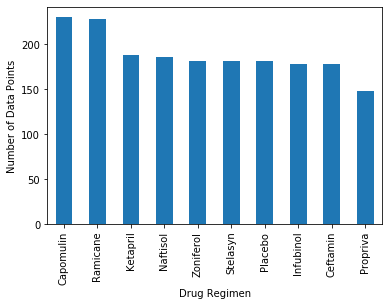

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drugcount=cleandata['Drug Regimen'].value_counts()
drugcount.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

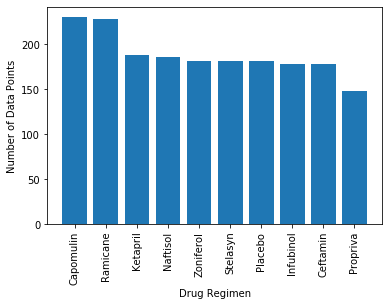

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(drugcount.index.values,drugcount.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

## Pie Plots

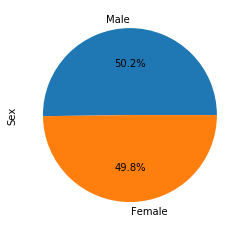

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendercount= mouse_metadata.Sex.value_counts()
gendercount.plot(kind="pie",autopct='%1.1f%%')
plt.show()

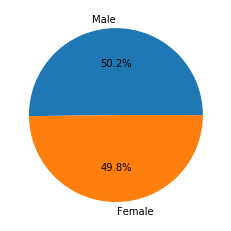

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gendercount.values,labels=gendercount.index.values,autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin, Ramicane, Infubinol, and Ceftamin
tumormax=cleandata.groupby("Mouse ID").max()
tumormax=tumormax.reset_index()
mergedata=tumormax[["Mouse ID","Timepoint"]].merge(cleandata,on=["Mouse ID","Timepoint"],how="left")
mergedata
Capomulin=mergedata.loc[mergedata["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
Ramicane=mergedata.loc[mergedata["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
Infubinol=mergedata.loc[mergedata["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Ceftamin=mergedata.loc[mergedata["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([Capomulin,Ramicane,Infubinol,Ceftamin],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.ylabel("tumorvolume")
plt.show()

## Line and Scatter Plots

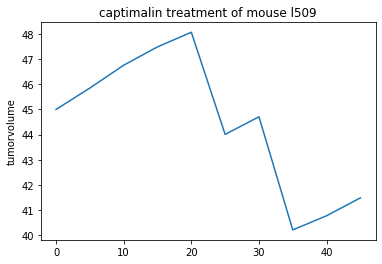

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
captimalindf=cleandata.loc[cleandata["Drug Regimen"]=="Capomulin"]
data=captimalindf.loc[captimalindf["Mouse ID"]=='l509']
plt.plot(data["Timepoint"],data["Tumor Volume (mm3)"])
plt.ylabel("tumorvolume")
plt.title("captimalin treatment of mouse l509")
plt.show()

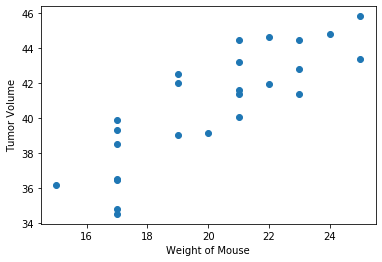

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Pull values for x and y values
captimalindf=cleandata.loc[cleandata["Drug Regimen"]=="Capomulin"]
capaverage=captimalindf.groupby(["Mouse ID"]).mean()
# Create Scatter Plot with values calculated above
plt.scatter(capaverage['Weight (g)'],capaverage['Tumor Volume (mm3)'])
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()
